In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators/heart.csv')

In [25]:
target='output'

X = df.drop(target, axis = 1)
y = df[target]

n = len(df)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X[:int(0.7*n)], y[:int(0.7*n)], test_size = 0.3, random_state = 42)

In [27]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test),columns=X.columns)

In [28]:
# Devuelve las variables binarias
binary_vars = [col for col in df.columns if df[col].nunique() == 2]

# Devuelve las variables categoricas
categorical_vars = [col for col in df.columns if (df[col].nunique() < 11 and col not in binary_vars)]

# devuelve las columnas que no estan escaladas (excluyendo las binarias y categoricas)
cols2scale = [col for col in df.columns if col not in binary_vars + categorical_vars]

# Escalado de caracteristicas
scaler = RobustScaler()
X_train[cols2scale] = scaler.fit_transform(X_train[cols2scale])
X_test[cols2scale] = scaler.transform(X_test[cols2scale])

In [29]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [ ]:
X_train=X_train[list(mi_scores.index[:7])]
X_test=X_test[list(mi_scores.index[:7])]



Training XGBoost...


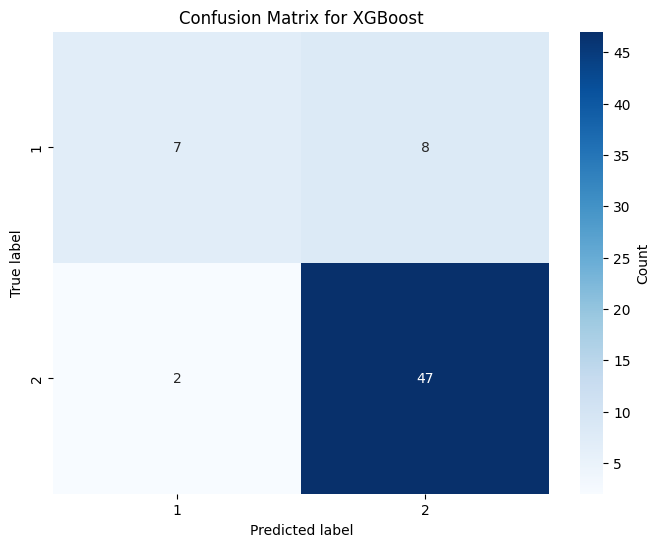



Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


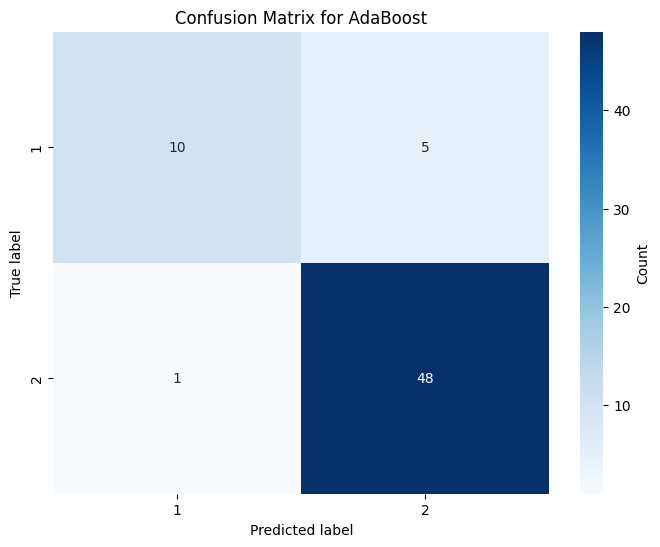

In [30]:
models = {
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

accuracies={} # Dictionary to store accuracies
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies[name] = accuracy # Stored under the model's name
    #print(f"{name} Accuracy: {accuracy}")
    #print(classification_report(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'},
                xticklabels=['1', '2'], yticklabels=['1', '2'])

    # Etiquetas de los ejes
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {name}')

    # Mostrar la gráfica
    plt.show()

# Convert the accuracies dictionary to a DataFrame
accuracies_df_1 = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])